In [1]:
from models.rgb_pretrain.Colour_Quantisation_1 import Model
import  torch
import numpy as np
import soundfile as sf
from torch import Tensor
import torchaudio.transforms as T
import matplotlib.pyplot as plt

md = Model()
checkpoint = torch.load(
    "a_train_log/pretrain/version_8/checkpoints/best_model-epoch=58-dev_eer=0.0000.ckpt"
    )
new_state_dict = {}
for key, value in checkpoint['state_dict'].items():
            if key.startswith('model.'):
                new_key = key[len('model.'):]
                new_state_dict[new_key] = value
            else:
                new_state_dict[key] = value
md.load_state_dict(new_state_dict)

/data8/wangzhiyong/miniconda3/envs/rgb/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<All keys matched successfully>

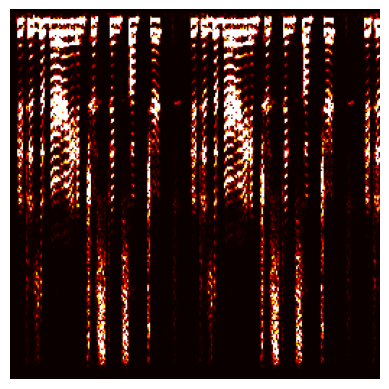

In [14]:
audio = "datasets/asvspoof2019/LA/ASVspoof2019_LA_train/flac/LA_T_1000648.flac"

def pad(x, max_len=65600):
    x_len = x.shape[0]
    if x_len >= max_len:
        return x[:max_len]
    # need to pad
    num_repeats = int(max_len / x_len) + 1
    padded_x = np.tile(x, (1, num_repeats))[:, :max_len][0]
    return padded_x
X, fs  = sf.read(audio)
X_pad = pad(X)
# to 3channel
specone = T.Spectrogram(n_fft=512)(Tensor(X_pad))

rgb_image = plt.get_cmap('hot')(specone)[:256,:256,:3]  # 去掉 alpha 通道
rgb_tensor = torch.from_numpy(rgb_image).permute(2, 0, 1)
rgb_tensor = rgb_tensor.numpy()
        
x_inp = Tensor(rgb_tensor)

plt.imshow(x_inp.permute(1,2,0))
plt.axis('off')  # 关闭坐标轴
plt.show()

In [15]:
rec,prob,base = md(x_inp.unsqueeze(0))

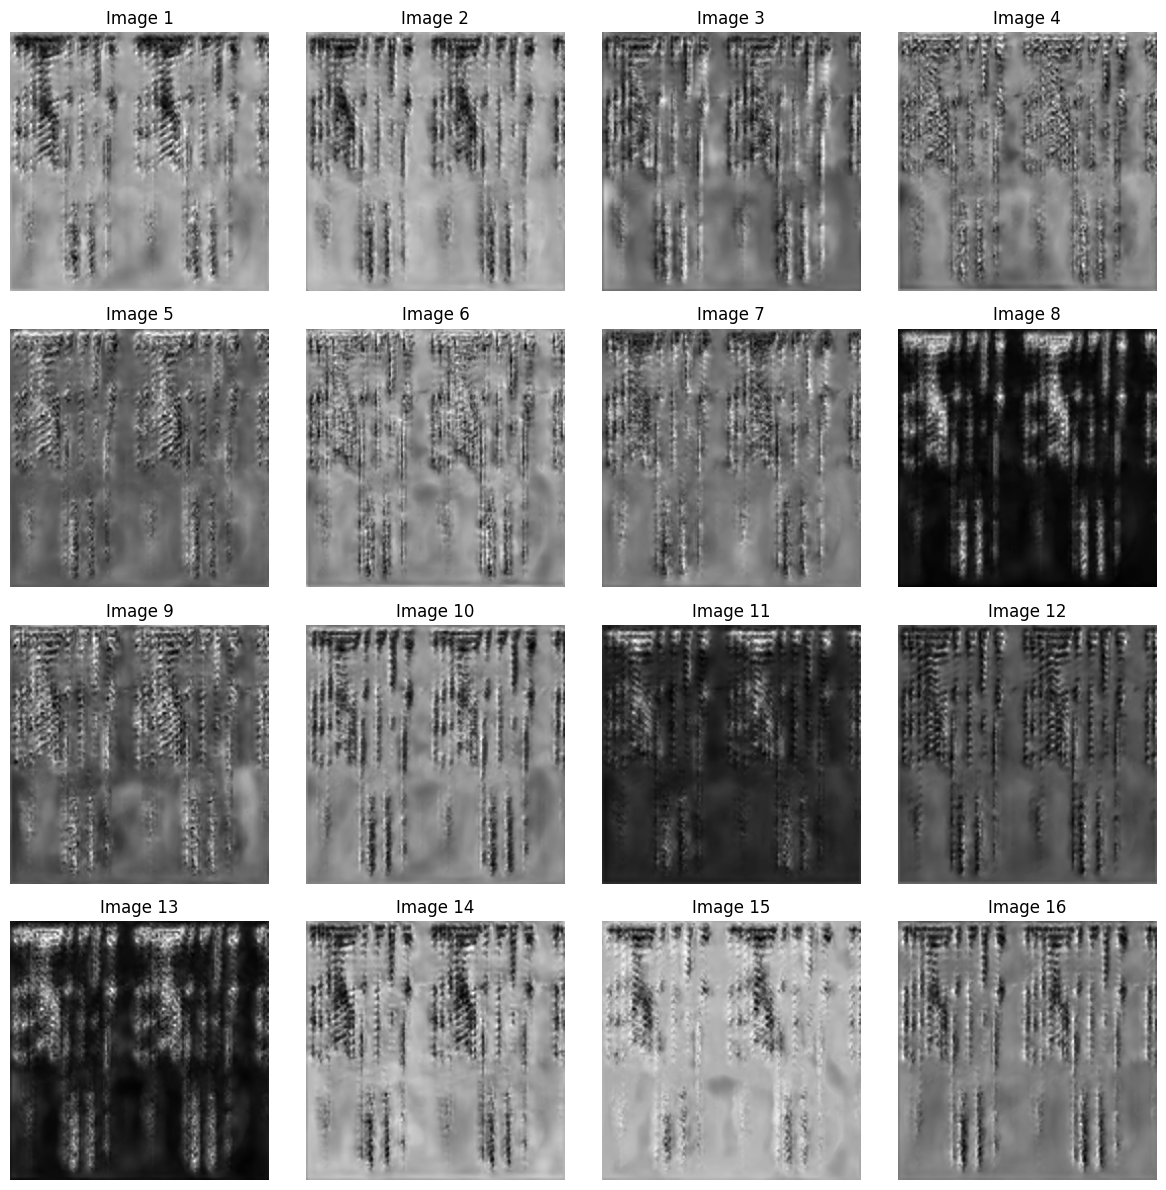

In [16]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))
# 遍历 tensor 的每个 slice (16张图片)
for i, ax in enumerate(axes.flat):
    ax.imshow(base[0][i].detach().numpy(), cmap='gray')
    ax.set_title(f'Image {i+1}')
    ax.axis('off')  # 隐藏坐标轴

# 调整子图布局
plt.tight_layout()
plt.show()

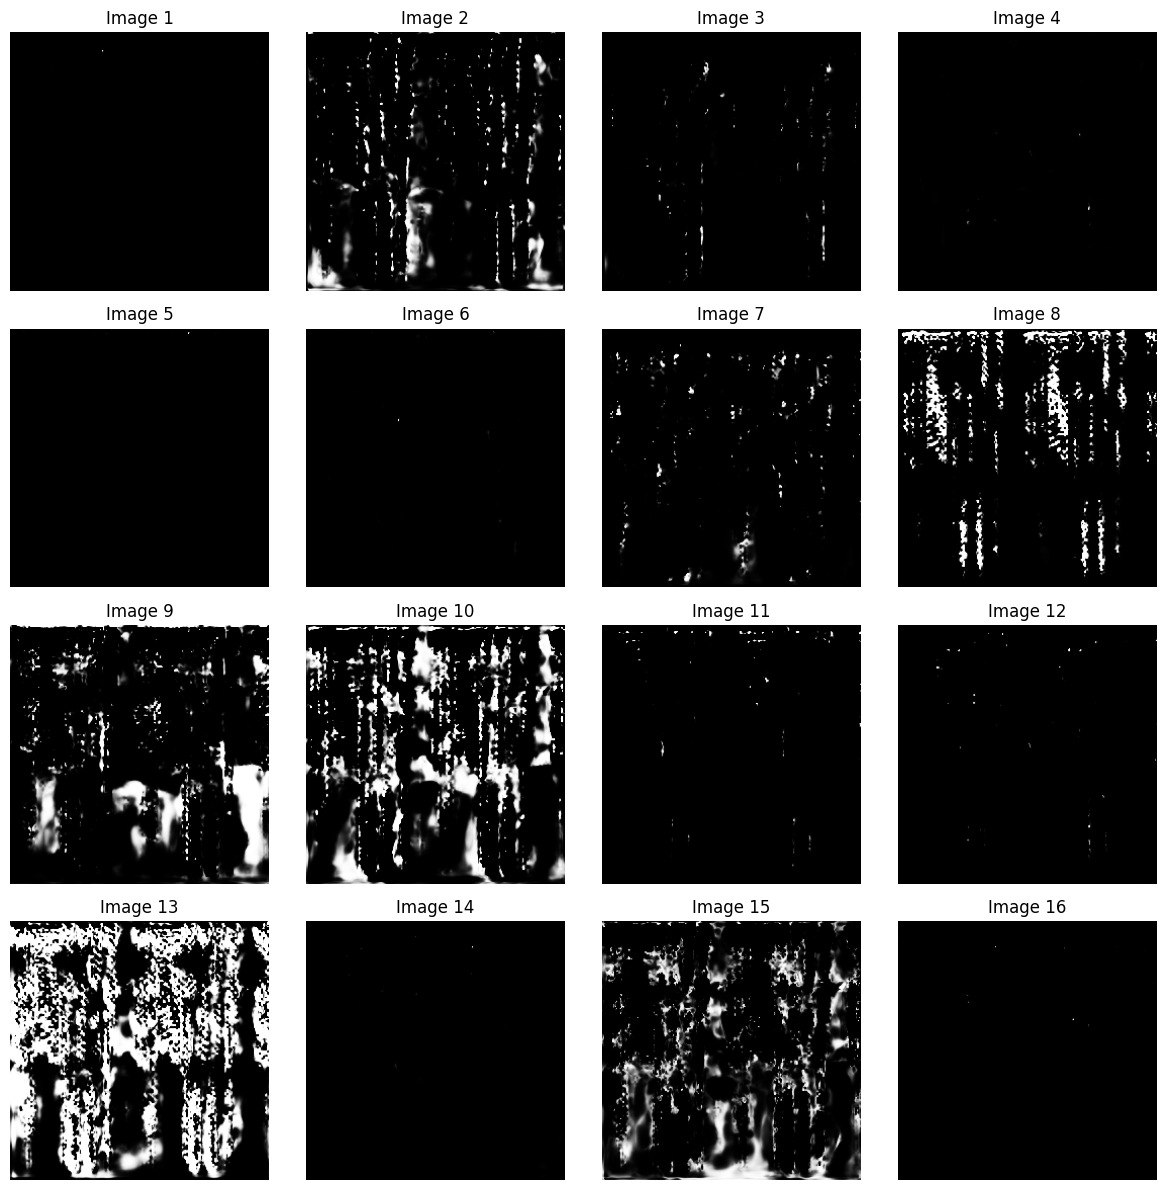

In [17]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))
# 遍历 tensor 的每个 slice (16张图片)
for i, ax in enumerate(axes.flat):
    ax.imshow(prob[0][i].detach().numpy(), cmap='gray')
    ax.set_title(f'Image {i+1}')
    ax.axis('off')  # 隐藏坐标轴

# 调整子图布局
plt.tight_layout()
plt.show()

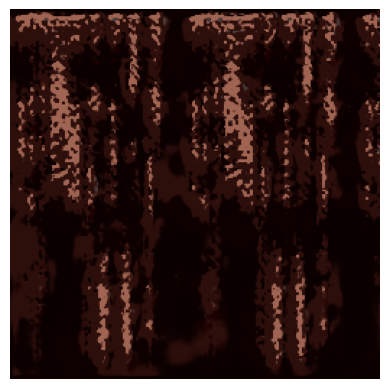

In [18]:
plt.imshow(rec[0].permute(1,2,0).detach().numpy())
plt.axis('off')  # 关闭坐标轴
plt.show()

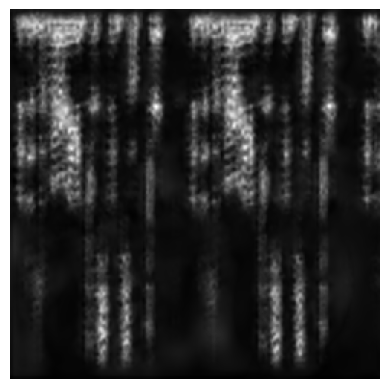

In [19]:
plt.imshow(base[0][7].detach().numpy(), cmap='gray')
plt.axis('off')  # 关闭坐标轴
plt.show()

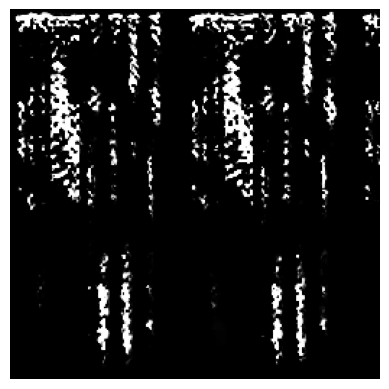

In [20]:
plt.imshow(prob[0][7].detach().numpy(), cmap='gray')
plt.axis('off')  # 关闭坐标轴
plt.show()

In [21]:
rec_inf,onehot = md(x_inp.unsqueeze(0),False)
onehot.shape

torch.Size([1, 16, 256, 256])

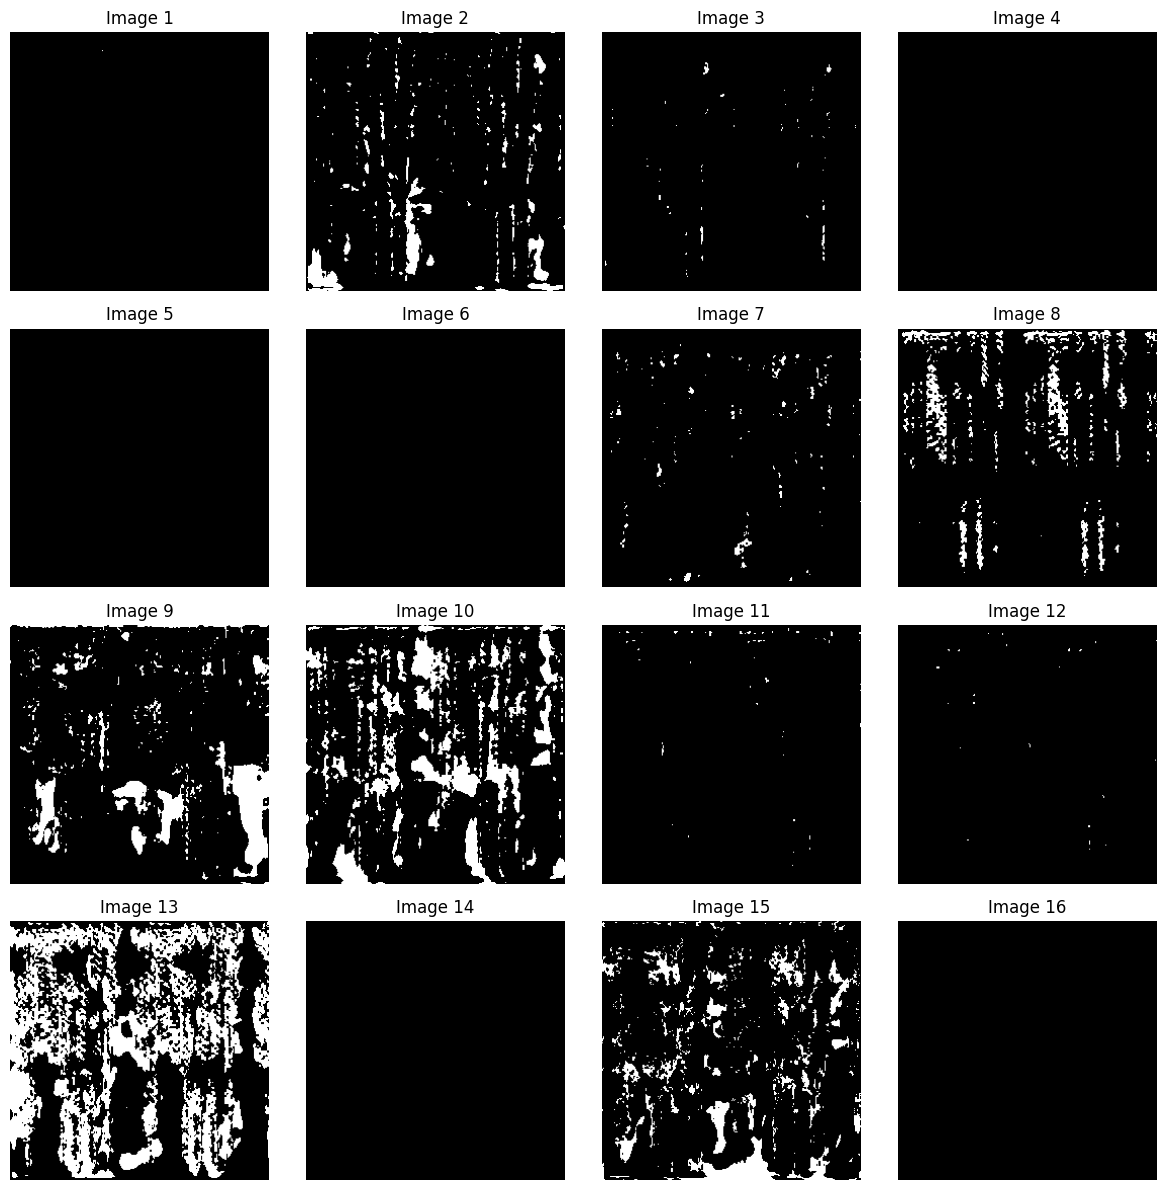

In [22]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))
# 遍历 tensor 的每个 slice (16张图片)
for i, ax in enumerate(axes.flat):
    ax.imshow(onehot[0][i].detach().numpy(), cmap='gray')
    ax.set_title(f'Image {i+1}')
    ax.axis('off')  # 隐藏坐标轴

# 调整子图布局
plt.tight_layout()
plt.show()

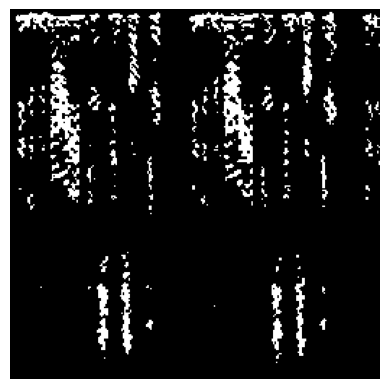

In [23]:
plt.imshow(onehot[0][7].detach().numpy(), cmap='gray')
plt.axis('off')  # 关闭坐标轴
plt.show()

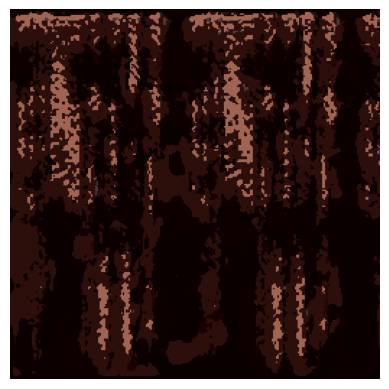

In [24]:
plt.imshow(rec_inf[0].permute(1,2,0).detach().numpy())
plt.axis('off')  # 关闭坐标轴
plt.show()